In [28]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg
import os
import json

# load demand data
# DATA_NAME = 'ndf50_mldat6e8_university'
DATA_NAME = 'artificial_light_chancap10_numchans1_mldatNone_bidirectional'
path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data_v2.json'.format(DATA_NAME)
benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Time to load data from /home/zciccwf/phd_project/projects/trafpy/trafpy/../data/benchmark_data/artificial_light_chancap10_numchans1_mldatNone_bidirectional_benchmark_data_v2.json: 0.003030538558959961 s


In [29]:
%autoreload

# organise into list of demand_data dicts
benchmarks = list(benchmark_data.keys())
demand_data_list = []
loads = []
for benchmark in benchmarks:
    for load in benchmark_data[benchmark]:
        for repeat in benchmark_data[benchmark][load]:
            demand_data = benchmark_data[benchmark][load][repeat]
            demand_data_list.append(demand_data)
            loads.append(load)
num_sets_of_demand_data = len(demand_data_list)
print('Number of sets of demand data: {}'.format(num_sets_of_demand_data))
print(demand_data_list[0])

Number of sets of demand data: 1
{'flow_id': ['flow_17', 'flow_28', 'flow_13', 'flow_25', 'flow_21', 'flow_12', 'flow_9', 'flow_3', 'flow_29', 'flow_26', 'flow_19', 'flow_10', 'flow_4', 'flow_2', 'flow_1', 'flow_27', 'flow_24', 'flow_14', 'flow_20', 'flow_16', 'flow_22', 'flow_15', 'flow_23', 'flow_6', 'flow_5', 'flow_7', 'flow_8', 'flow_18', 'flow_0', 'flow_11'], 'sn': ['server_3', 'server_0', 'server_1', 'server_2', 'server_0', 'server_2', 'server_1', 'server_2', 'server_0', 'server_1', 'server_1', 'server_3', 'server_3', 'server_0', 'server_0', 'server_2', 'server_3', 'server_2', 'server_0', 'server_1', 'server_2', 'server_0', 'server_1', 'server_0', 'server_2', 'server_0', 'server_3', 'server_2', 'server_0', 'server_3'], 'dn': ['server_1', 'server_1', 'server_0', 'server_1', 'server_3', 'server_3', 'server_2', 'server_1', 'server_1', 'server_3', 'server_0', 'server_1', 'server_1', 'server_3', 'server_2', 'server_3', 'server_0', 'server_0', 'server_2', 'server_2', 'server_1', 'serve

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6674: RuntimeWarning: invalid value encountered in multiply
  tops = (tops * np.diff(bins))[:, slc].cumsum(axis=1)[:, slc]


+----+--------+---------+-------+---------+------------+--------+--------+------------+-----------+
|    | Name   |   Flows |   1st |    Last |   Duration |   Info |   Load |   Smallest |   Largest |
|----+--------+---------+-------+---------+------------+--------+--------+------------+-----------|
|  0 | demand |      30 |     0 | 34.4444 |    34.4444 |    620 |     36 |         10 |        30 |
+----+--------+---------+-------+---------+------------+--------+--------+------------+-----------+


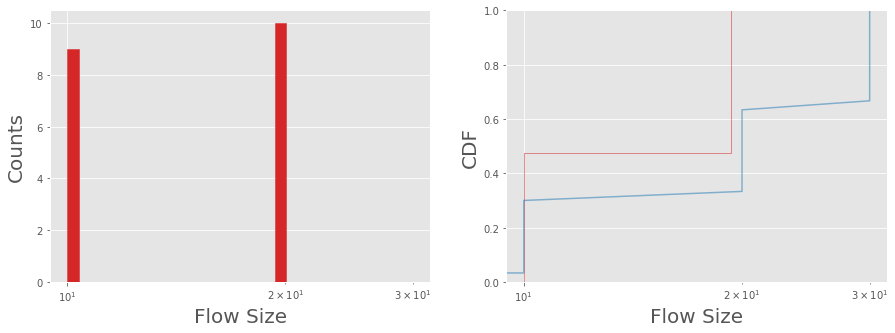

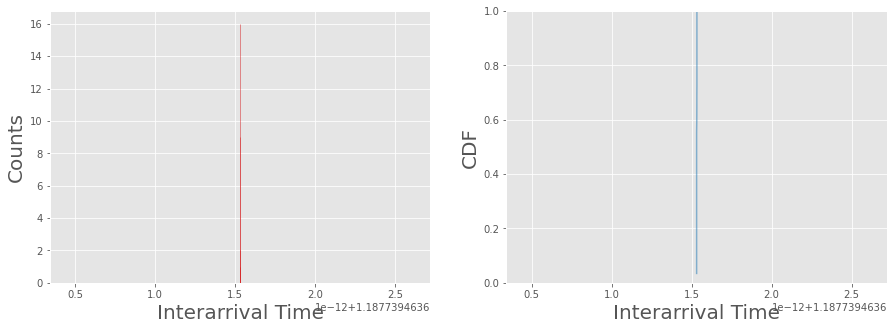

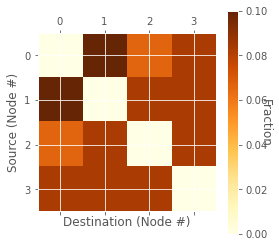

<Figure size 432x288 with 0 Axes>

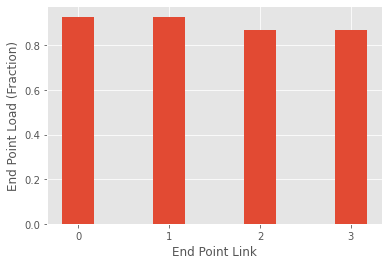

<Figure size 432x288 with 0 Axes>

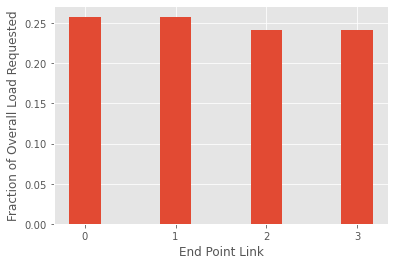

<Figure size 432x288 with 0 Axes>

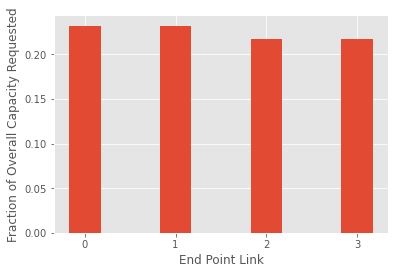

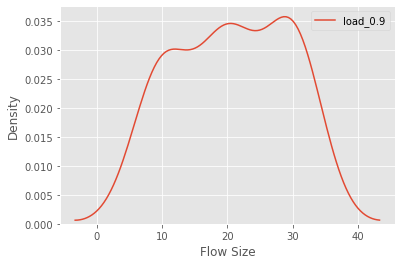

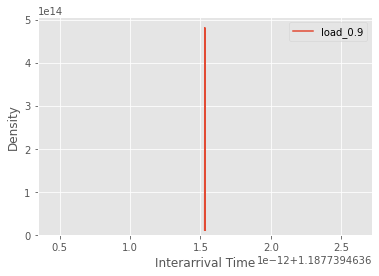

In [30]:
%autoreload
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # disable warnings
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

# for plotting
# net = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=500, rack_to_edge_channel_capacity=40000, edge_to_agg_channel_capacity=40000, agg_to_core_channel_capacity=40000)
net = tpg.gen_fat_tree(k=2, N=2, num_channels=1, server_to_rack_channel_capacity=10, rack_to_edge_channel_capacity=500, edge_to_agg_channel_capacity=500, agg_to_core_channel_capacity=500)
slot_size = 1e6

# create demand objects and print analysis summary
demands = []
for demand_data, load in zip(demand_data_list, loads):
    demand = Demand(demand_data, net.graph['endpoints'])
    demand.name = 'load_{}'.format(load) # name for multi-plot jjlegend(s)
    demands.append(demand)
    plotter = DemandPlotter(demand)
    plotter.plot_flow_size_dist(logscale=True, num_bins=30)
    plotter.plot_interarrival_time_dist(logscale=False, num_bins=30)
    plotter.plot_node_dist(eps=net.graph['endpoints'])
    plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=10)
#     plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=500)
#     plotter.plot_link_loads_vs_time(net, slot_size, demand, mean_period='all')
analyser = DemandsAnalyser(*demands)
analyser.compute_metrics(print_summary=True)

plotters = DemandsPlotter(*demands)
_ = plotters.plot_flow_size_dists(logscale=False)
_ = plotters.plot_interarrival_time_dists(logscale=False)

In [23]:
print(demand.num_demands)
print(len(demand['flow_id']))

30


TypeError: 'Demand' object is not subscriptable

In [ ]:
_ = plotters.plot_link_loads_vs_time_for_different_loads(logscale=False)

In [ ]:
%autoreload
print('Keys of first demand data set:\n{}'.format(demand_data_list[0].keys()))
# print('\nStructure of first demand data set:\n{}'.format(demand_data_list[0]))

In [ ]:
%autoreload
for benchmark in benchmarks:
    print(benchmark_data[benchmark].keys())
    for load in list(benchmark_data[benchmark].keys()):
        for repeat in benchmark_data[benchmark][load]:
            print('benchmark: {} | load: {} | repeat: {}'.format(benchmark,load,repeat))

In [ ]:
%autoreload
from trafpy.generator import Demand
import sys
import json

demand = Demand(demand_data_list[-1])
for SLOT_SIZE in [1e4]:
    slots_dict = demand.get_slots_dict(SLOT_SIZE, print_info=True)

In [ ]:
slots_dict[0]